In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## OLS Gradient Descent

            0         1
0    1.353092  2.934731
1    2.672441  3.698828
2    3.653673  4.285336
3    4.381667  4.738588
4    4.920019  5.091806
..        ...       ...
995  4.517317  9.999628
996  4.517317  9.999628
997  4.517317  9.999628
998  4.517317  9.999628
999  4.517317  9.999628

[1000 rows x 2 columns]


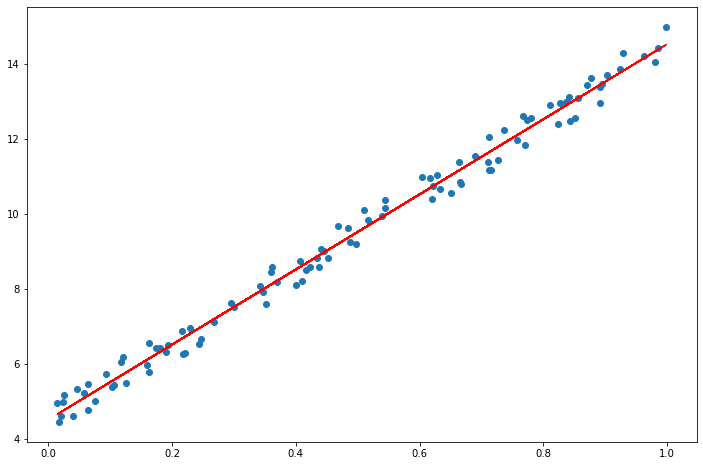

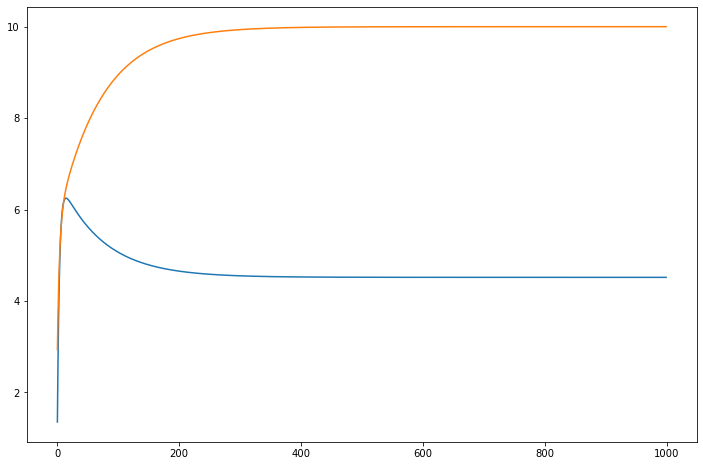

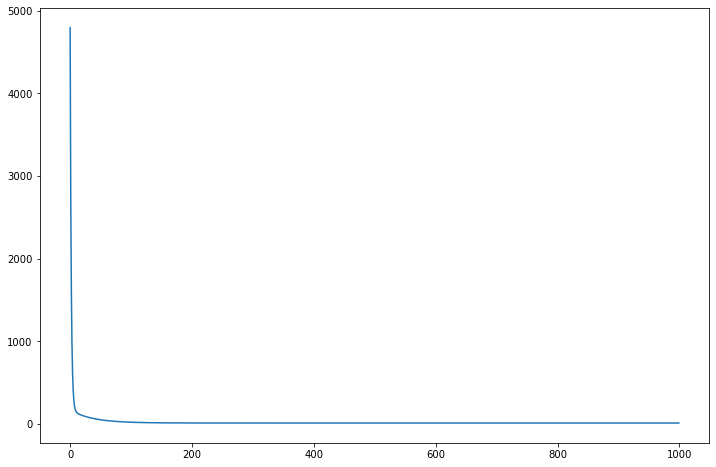

In [123]:
x = np.random.rand(100,1)
y = 4 + 10 * x + np.random.rand(100,1)

# On ajoute une colonne de 1 au vecteur de x

x = np.c_[np.ones((100,1)), x]

# Gradient descent
eta = 0.1
n_iterations = 1000
m = len(x)
theta = np.random.randn(2,1)
theta_values = {}
res_values ={}


for i in range(n_iterations):
    gradient = (2/m * x.T.dot(y - x.dot(theta)))
    theta = theta + eta * gradient
    theta_values[i] = [np.float(theta[0]), np.float(theta[1])] 
    res = sum((y - (x.dot(theta)))**2)
    res_values[i] = np.float(res)


df_theta = pd.DataFrame.from_dict(theta_values, orient = "index")
df_res = pd.DataFrame.from_dict(res_values, orient = "index")

# Graphique 1
y_hat = x.dot(theta)
plt.figure(figsize = (12,8))
plt.scatter(x[:,1], y)
plt.plot(x[:,1], y_hat, "-r")

# Graphique 2
plt.figure(figsize = (12,8))
plt.plot(df_theta.index, df_theta[0])
plt.plot(df_theta.index, df_theta[1])

# Graphique 3
plt.figure(figsize = (12,8))
plt.plot(df_res)

## Iris dataset

In [3]:
df = pd.read_csv("/Users/guillaumedenis/Programmation/Datasets/iris.csv")
df.columns = df.columns.str.lower()

print(df.info()) # La base de données est complète
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Nettoyage
df.drop("id", axis = 1, inplace = True)

df.columns = df.columns.str.lower()

# Création de variables dummy
# df = pd.get_dummies(df, columns = ["species"])

# Normalisation
columns = ["sepallengthcm", "sepalwidthcm", "petallengthcm", "petalwidthcm"]

df[columns] = df[columns].apply(lambda x: (x-np.mean(x))/np.std(x) )
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [91]:
# Training et testing dataset
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2, random_state=1)  

# Multinominal regression
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X_train, y_train)
softmax_reg.score(X_test, y_test)

# Coéfficients
print(softmax_reg.coef_)

[[-1.62935804  1.69136212 -3.40748763 -3.14456623]
 [ 1.22719366 -0.40444592 -1.31672211 -1.33221113]
 [ 0.40216438 -1.2869162   4.72420974  4.47677735]]


In [6]:
# Calcul manuel
def softmax_function(logits):
    numerator = np.exp(logits)
    denumerator = np.sum(numerator, axis = 1)
    return numerator.divide(denumerator, axis =0)

In [125]:
eta = 0.01
n_iterations = 10001
epsilon = 1e-7
y_train_dum = pd.get_dummies(y_train)

theta = np.random.randn(X_train.shape[1], len(y_train.unique()))

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax_function(logits)
    
    # On applique la cross entropy function
    y_proba_ln = np.log(y_proba + epsilon)
    loss = np.mean(np.sum(y_train_dum.mul(y_proba_ln.values), axis = 1))
    
    # Calcul de l'erreur
    error = y_proba.subtract(y_train_dum.values)
    gradient = (X_train.T.dot(error)) *(1/X_train.shape[0])
    if iteration%500==0:
        print(iteration, loss)
    theta = theta - gradient * eta

print("\n")
print(theta.T)
   

0 -2.5665029567277715
500 -0.4361958012211586
1000 -0.3515361150451054
1500 -0.32842593406189763
2000 -0.3169664971771893
2500 -0.3096930066715204
3000 -0.3045347047419455
3500 -0.30065554615789364
4000 -0.2976285888574959
4500 -0.29520265324571504
5000 -0.2932167801731775
5500 -0.2915620486133777
6000 -0.2901619285437851
6500 -0.28896112302804494
7000 -0.2879187831605361
7500 -0.2870041754636443
8000 -0.2861938121835783
8500 -0.28546949521878523
9000 -0.2848169512704624
9500 -0.28422486063990005
10000 -0.28368415438484956


   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
0      -1.006698      2.697168      -2.362927     -1.127932
1       0.479142     -0.252686       0.567947     -0.942317
2      -0.447636      1.199950       1.720781      1.413318


In [128]:
# Prédiction training dataset
logits = X_train.dot(theta)
y_proba = softmax_function(logits)

y_predict = np.argmax(y_proba.values, axis = 1) # Prédictions
y_real = np.argmax(y_train_dum.values, axis =1) # Vraies valeurs

score = np.mean(y_predict == y_real) # Score training dataset
print("Training dataset:", score)


# Prédiction testing dataset
logits = X_test.dot(theta)
y_proba = softmax_function(logits)

y_predict = np.argmax(y_proba.values, axis = 1) # Prédictions
y_test_dum = pd.get_dummies(y_test)

y_real = np.argmax(y_test_dum.values, axis =1) # Vraies valeurs

score = np.mean(y_predict == y_real) # Score training dataset
print("Training dataset:", score)

Training dataset: 0.8666666666666667
Training dataset: 0.7666666666666667
